In [148]:
# Importing only the necessary libraries for building the model
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

In [149]:
# Load the dataset to review its structure and contents
lego_data_file_path = 'dataset/LEGO Sets and Prices Over Time/LEGO Sets and Prices Over Time.csv'
lego_data = pd.read_csv(lego_data_file_path)

# Display the first few rows to understand the structure of the dataset
lego_data.head()

,Set_ID,Name,Year,Theme,Theme_Group,Subtheme,Category,Packaging,Num_Instructions,Availability,Pieces,Minifigures,Owned,Rating,USD_MSRP,Total_Quantity,Current_Price
0,75-1,PreSchool Set,1975,PreSchool,Pre-school,NaN,Normal,{Not specified},0,{Not specified},16.0,NaN,10.0,0.0,NaN,NaN,NaN
1,77-1,PreSchool Set,1975,PreSchool,Pre-school,NaN,Normal,{Not specified},0,{Not specified},20.0,NaN,11.0,0.0,NaN,NaN,NaN
2,077-1,Pre-School Set,1975,Duplo,Pre-school,NaN,Normal,{Not specified},0,{Not specified},21.0,NaN,10.0,0.0,NaN,0.0,NaN
3,78-1,PreSchool Set,1975,PreSchool,Pre-school,NaN,Normal,{Not specified},0,{Not specified},32.0,NaN,8.0,0.0,NaN,NaN,NaN
4,78-3,Basic Set,1975,Samsonite,Vintage,Basic set,Normal,Box,0,{Not specified},330.0,NaN,10.0,0.0,NaN,0.0,NaN


# Data Filtering

In [150]:
# Filter the dataset for entries from 2019 to the present
lego_data_filtered = lego_data[lego_data['Year'] >= 2019]

# Check for missing values and data types in the filtered dataset
missing_data = lego_data_filtered.isnull().sum()
data_types = lego_data_filtered.dtypes

# Display the results
missing_data, data_types

(Set_ID                 0
 Name                   0
 Year                   0
 Theme                  0
 Theme_Group           19
 Subtheme             289
 Category               0
 Packaging              0
 Num_Instructions       0
 Availability           0
 Pieces               207
 Minifigures         1006
 Owned                101
 Rating                 0
 USD_MSRP             841
 Total_Quantity       417
 Current_Price       1000
 dtype: int64,
 Set_ID               object
 Name                 object
 Year                  int64
 Theme                object
 Theme_Group          object
 Subtheme             object
 Category             object
 Packaging            object
 Num_Instructions      int64
 Availability         object
 Pieces              float64
 Minifigures         float64
 Owned               float64
 Rating              float64
 USD_MSRP            float64
 Total_Quantity      float64
 Current_Price       float64
 dtype: object)

In [151]:
# Drop rows where 'Current_Price' is missing
lego_data_filtered_dropped_current_price = lego_data_filtered.dropna(subset=['Current_Price'])

# Drop the specified columns
lego_data_filtered_dropped_columns = lego_data_filtered_dropped_current_price.drop(columns=['Set_ID', 'Subtheme', 'Packaging', 'Num_Instructions', 'Availability', 'Minifigures'])

# Check for remaining missing values after dropping the columns
missing_data_after_dropped_columns = lego_data_filtered_dropped_columns.isnull().sum()

# Display the results
missing_data_after_dropped_columns

Name                0
Year                0
Theme               0
Theme_Group         0
Category            0
Pieces             14
Owned               0
Rating              0
USD_MSRP          316
Total_Quantity      0
Current_Price       0
dtype: int64

In [152]:
lego_data_filtered_dropped_columns

,Name,Year,Theme,Theme_Group,Category,Pieces,Owned,Rating,USD_MSRP,Total_Quantity,Current_Price
12436,Corner Garage,2019,Creator Expert,Model making,Normal,2569.0,17423.0,4.1,199.99,81.0,258.3622
12437,Ford Mustang,2019,Creator Expert,Model making,Normal,1471.0,15100.0,4.5,169.99,4.0,130.0000
12438,NASA Apollo 11 Lunar Lander,2019,Creator Expert,Model making,Normal,1087.0,18817.0,4.4,99.99,19.0,85.0000
12439,Gingerbread House,2019,Creator Expert,Model making,Normal,1477.0,14741.0,4.2,99.99,57.0,127.0000
12440,Harley-Davidson Fat Boy,2019,Creator Expert,Model making,Normal,1023.0,7107.0,4.2,99.99,19.0,111.9900
...,...,...,...,...,...,...,...,...,...,...,...
14896,Temple of the Golden Idol,2023,Indiana Jones,Licensed,Normal,1545.0,1415.0,4.8,149.99,1.0,170.1470
14897,Monkie Kid's Combi Mech,2023,Monkie Kid,Action/Adventure,Normal,277.0,249.0,0.0,19.99,1.0,32.0000
14908,Master Wu vs. Ghost Archer,2023,Ninjago,Action/Adventure,Other,12.0,161.0,0.0,NaN,1.0,9.9500
14922,"Cave Explorer, Creeper and Slime",2023,Minecraft,Licensed,Other,30.0,226.0,0.0,NaN,1.0,7.0000


In [153]:
# Impute missing numerical values with the median
numerical_columns = lego_data_filtered_dropped_columns.select_dtypes(include=['float64']).columns
lego_data_filtered_dropped_columns[numerical_columns] = lego_data_filtered_dropped_columns[numerical_columns].apply(lambda x: x.fillna(x.median()))

# Impute missing categorical values with "Unknown"
categorical_columns = lego_data_filtered_dropped_columns.select_dtypes(include=['object']).columns
lego_data_filtered_dropped_columns[categorical_columns] = lego_data_filtered_dropped_columns[categorical_columns].apply(lambda x: x.fillna('Unknown'))

# Make a copy of the new data
model_lego_data_cleaned = lego_data_filtered_dropped_columns.copy()

# Check if any missing values remain
missing_data_after_imputation = model_lego_data_cleaned.isnull().sum()

# Display the results
missing_data_after_imputation

Name              0
Year              0
Theme             0
Theme_Group       0
Category          0
Pieces            0
Owned             0
Rating            0
USD_MSRP          0
Total_Quantity    0
Current_Price     0
dtype: int64

#### Clean Dataset Summary:
    Numerical Features: Fully imputed using the median.
    Categorical Features: Missing values replaced with "Unknown."

# Feature Engineering

In [154]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to categorical columns
model_lego_data_cleaned['Theme_ID'] = label_encoder.fit_transform(model_lego_data_cleaned['Theme'])
model_lego_data_cleaned['Theme_Group_ID'] = label_encoder.fit_transform(model_lego_data_cleaned['Theme_Group'])
model_lego_data_cleaned['Category_ID'] = label_encoder.fit_transform(model_lego_data_cleaned['Category'])

In [155]:
# Feature Engineering
# Calculate Age of Set (current year - Year)
current_year = 2024
model_lego_data_cleaned['Age_of_Set'] = current_year - model_lego_data_cleaned['Year']
model_lego_data_cleaned['Age_of_Set'] = model_lego_data_cleaned['Age_of_Set'].astype('float64')

# Calculate Price per Piece, avoiding division by zero
model_lego_data_cleaned['Price_per_Piece'] = np.where(
    model_lego_data_cleaned['Pieces'] > 0,
    model_lego_data_cleaned['USD_MSRP'] / model_lego_data_cleaned['Pieces'],
    np.nan
)

# Impute NaN values in Price_per_Piece with the median of the column
model_lego_data_cleaned['Price_per_Piece'] = model_lego_data_cleaned['Price_per_Piece'].fillna(model_lego_data_cleaned['Price_per_Piece'].median())

# Feature Engineering: Create Age_to_Price_Ratio
model_lego_data_cleaned['Age_to_Price_Ratio'] = model_lego_data_cleaned['Age_of_Set'] / model_lego_data_cleaned['USD_MSRP']

# Convert Theme_Group_ID to numeric before interaction
model_lego_data_cleaned['Theme_Group_ID'] = model_lego_data_cleaned['Theme_Group_ID'].astype('float64')

# Interaction Term: Theme_Group_ID x Total_Quantity
model_lego_data_cleaned['Theme_Quantity_Interaction'] = (
    model_lego_data_cleaned['Theme_Group_ID'] * model_lego_data_cleaned['Total_Quantity']
)

# Price Elasticity Proxy: Current_Price / USD_MSRP (avoiding division by zero)
model_lego_data_cleaned['Price_Elasticity'] = np.where(
    model_lego_data_cleaned['USD_MSRP'] > 0,
    model_lego_data_cleaned['Current_Price'] / model_lego_data_cleaned['USD_MSRP'],
    1
)

# Profit Margin: Current_Price - USD_MSRP
model_lego_data_cleaned['Profit_Margin'] = (
    model_lego_data_cleaned['Current_Price'] - model_lego_data_cleaned['USD_MSRP']
)

# Relative Quantity: Total_Quantity as a proportion of total market quantity
total_quantity_sum = model_lego_data_cleaned['Total_Quantity'].sum()
model_lego_data_cleaned['Relative_Quantity'] = model_lego_data_cleaned['Total_Quantity'] / total_quantity_sum

# Lag Features: Shift Total_Quantity and Current_Price by 1 year for time-series effects
model_lego_data_cleaned['Lag_Total_Quantity'] = model_lego_data_cleaned['Total_Quantity'].shift(1)
model_lego_data_cleaned['Lag_Current_Price'] = model_lego_data_cleaned['Current_Price'].shift(1)

# Drop rows with NaN values caused by lag features
model_lego_data_cleaned.dropna(subset=['Lag_Total_Quantity', 'Lag_Current_Price'], inplace=True)

# Check the first few rows to confirm the new features
model_lego_data_cleaned[['Age_of_Set','Price_per_Piece','Age_to_Price_Ratio','Theme_Quantity_Interaction', 'Price_Elasticity','Profit_Margin',
    'Relative_Quantity', 'Lag_Total_Quantity', 'Lag_Current_Price']].describe()

,Age_of_Set,Price_per_Piece,Age_to_Price_Ratio,Theme_Quantity_Interaction,Price_Elasticity,Profit_Margin,Relative_Quantity,Lag_Total_Quantity,Lag_Current_Price
count,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000
mean,3.375584,0.560591,0.153130,101.062041,1.061428,-0.312933,0.000665,21.965977,50.754546
std,1.267744,3.903165,0.163377,276.400547,1.100814,39.471539,0.001601,52.724903,76.553787
min,1.000000,0.019221,0.002000,0.000000,0.024895,-174.990000,0.000030,1.000000,0.730000
25%,2.000000,0.087730,0.050008,8.000000,0.650023,-18.010000,0.000061,2.000000,12.000000
50%,3.000000,0.118140,0.100033,28.000000,0.893973,-2.490000,0.000213,7.000000,25.990000
75%,4.500000,0.201919,0.200080,84.000000,1.200040,5.000000,0.000577,19.000000,57.389500
max,5.000000,107.475000,1.253133,6378.000000,19.930930,567.738600,0.032282,1063.000000,970.000000


In [156]:
# Convert to categorical dtype
model_lego_data_cleaned['Theme_ID'] = model_lego_data_cleaned['Theme_ID'].astype('category')
model_lego_data_cleaned['Theme_Group_ID'] = model_lego_data_cleaned['Theme_Group_ID'].astype('category')
model_lego_data_cleaned['Category_ID'] = model_lego_data_cleaned['Category_ID'].astype('category')

#### Label Encoding Results:
    The categorical columns (Theme, Theme_Group, Category) have been successfully encoded and converted to categorical data types. Here's a preview of the encoded values:
    
    Theme: Numerical encoding for the LEGO theme.
    Theme_Group: Encoded grouping of the themes.
    Category: Encoded LEGO set categories.

In [157]:
# Check the first few rows to confirm label encoding and dtype
model_lego_data_cleaned[['Theme', 'Theme_ID', 'Theme_Group', 'Theme_Group_ID', 'Category', 'Category_ID']]

,Theme,Theme_ID,Theme_Group,Theme_Group_ID,Category,Category_ID
12437,Creator Expert,9,Model making,6.0,Normal,2
12438,Creator Expert,9,Model making,6.0,Normal,2
12439,Creator Expert,9,Model making,6.0,Normal,2
12440,Creator Expert,9,Model making,6.0,Normal,2
12441,Disney,11,Licensed,4.0,Normal,2
...,...,...,...,...,...,...
14896,Indiana Jones,21,Licensed,4.0,Normal,2
14897,Monkie Kid,28,Action/Adventure,0.0,Normal,2
14908,Ninjago,29,Action/Adventure,0.0,Other,3
14922,Minecraft,25,Licensed,4.0,Other,3


In [158]:
model_lego_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1499 entries, 12437 to 14925
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Name                        1499 non-null   object  
 1   Year                        1499 non-null   int64   
 2   Theme                       1499 non-null   object  
 3   Theme_Group                 1499 non-null   object  
 4   Category                    1499 non-null   object  
 5   Pieces                      1499 non-null   float64 
 6   Owned                       1499 non-null   float64 
 7   Rating                      1499 non-null   float64 
 8   USD_MSRP                    1499 non-null   float64 
 9   Total_Quantity              1499 non-null   float64 
 10  Current_Price               1499 non-null   float64 
 11  Theme_ID                    1499 non-null   category
 12  Theme_Group_ID              1499 non-null   category
 13  Category_ID       

In [159]:
model_lego_data_cleaned

,Name,Year,Theme,Theme_Group,Category,Pieces,Owned,Rating,USD_MSRP,Total_Quantity,...,Category_ID,Age_of_Set,Price_per_Piece,Age_to_Price_Ratio,Theme_Quantity_Interaction,Price_Elasticity,Profit_Margin,Relative_Quantity,Lag_Total_Quantity,Lag_Current_Price
12437,Ford Mustang,2019,Creator Expert,Model making,Normal,1471.0,15100.0,4.5,169.99,4.0,...,2,5.0,0.115561,0.029413,24.0,0.764751,-39.990,0.000121,81.0,258.3622
12438,NASA Apollo 11 Lunar Lander,2019,Creator Expert,Model making,Normal,1087.0,18817.0,4.4,99.99,19.0,...,2,5.0,0.091987,0.050005,114.0,0.850085,-14.990,0.000577,4.0,130.0000
12439,Gingerbread House,2019,Creator Expert,Model making,Normal,1477.0,14741.0,4.2,99.99,57.0,...,2,5.0,0.067698,0.050005,342.0,1.270127,27.010,0.001731,19.0,85.0000
12440,Harley-Davidson Fat Boy,2019,Creator Expert,Model making,Normal,1023.0,7107.0,4.2,99.99,19.0,...,2,5.0,0.097742,0.050005,114.0,1.120012,12.000,0.000577,57.0,127.0000
12441,Woody & RC,2019,Disney,Licensed,Normal,69.0,4402.0,3.7,9.99,29.0,...,2,5.0,0.144783,0.500501,116.0,1.496496,4.960,0.000881,19.0,111.9900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14896,Temple of the Golden Idol,2023,Indiana Jones,Licensed,Normal,1545.0,1415.0,4.8,149.99,1.0,...,2,1.0,0.097081,0.006667,4.0,1.134389,20.157,0.000030,4.0,33.1000
14897,Monkie Kid's Combi Mech,2023,Monkie Kid,Action/Adventure,Normal,277.0,249.0,0.0,19.99,1.0,...,2,1.0,0.072166,0.050025,0.0,1.600800,12.010,0.000030,1.0,170.1470
14908,Master Wu vs. Ghost Archer,2023,Ninjago,Action/Adventure,Other,12.0,161.0,0.0,29.99,1.0,...,3,1.0,2.499167,0.033344,0.0,0.331777,-20.040,0.000030,1.0,32.0000
14922,"Cave Explorer, Creeper and Slime",2023,Minecraft,Licensed,Other,30.0,226.0,0.0,29.99,1.0,...,3,1.0,0.999667,0.033344,4.0,0.233411,-22.990,0.000030,1.0,9.9500


In [160]:
df = pd.DataFrame(model_lego_data_cleaned)

# Save the DataFrame to a CSV file
df.to_csv('model_lego_data_cleaned.csv', index=False)

print("DataFrame saved to 'model_lego_data_cleaned.csv'")

DataFrame saved to 'model_lego_data_cleaned.csv'


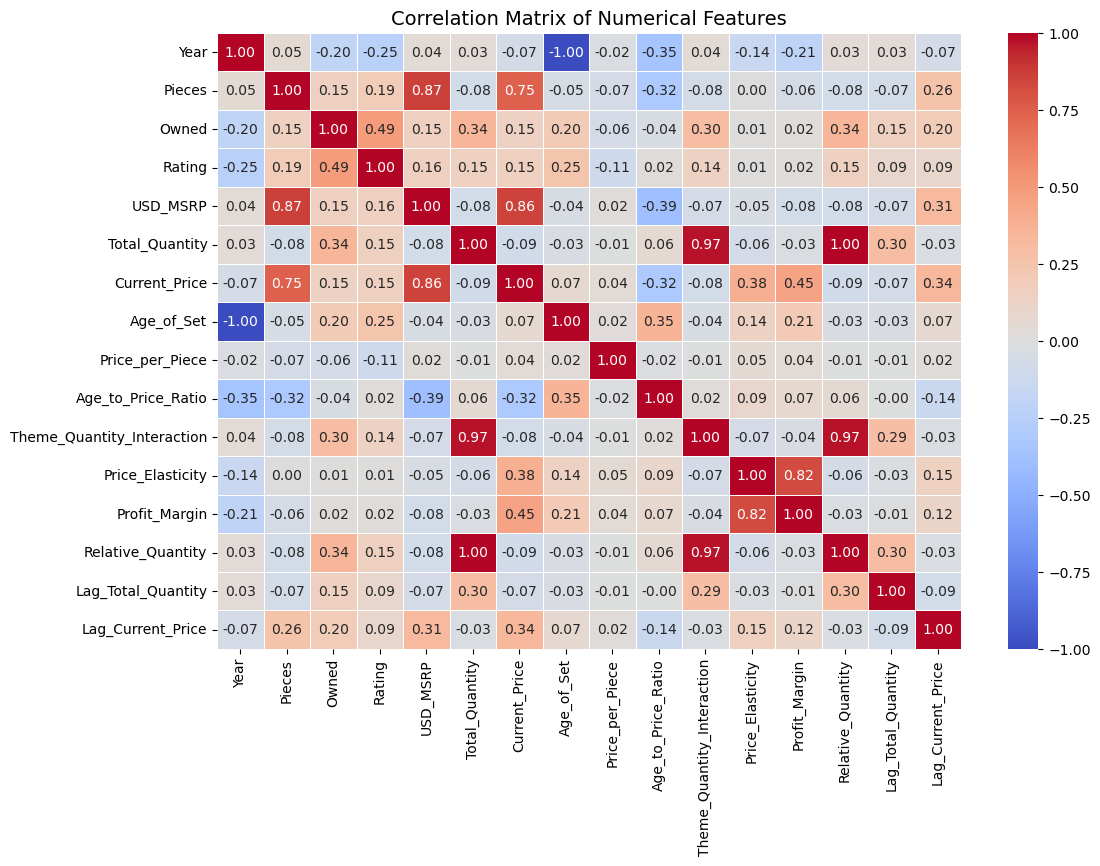

,Year,Pieces,Owned,Rating,USD_MSRP,Total_Quantity,Current_Price,Age_of_Set,Price_per_Piece,Age_to_Price_Ratio,Theme_Quantity_Interaction,Price_Elasticity,Profit_Margin,Relative_Quantity,Lag_Total_Quantity,Lag_Current_Price
Year,1.000000,0.052404,-0.196424,-0.248471,0.042060,0.032702,-0.068241,-1.000000,-0.023651,-0.352348,0.041796,-0.143345,-0.205121,0.032702,0.031728,-0.070092
Pieces,0.052404,1.000000,0.153407,0.188136,0.865008,-0.082933,0.745449,-0.052404,-0.065325,-0.320269,-0.076517,0.000309,-0.060595,-0.082933,-0.072319,0.263935
Owned,-0.196424,0.153407,1.000000,0.485633,0.151065,0.344369,0.145115,0.196424,-0.063039,-0.042455,0.298907,0.011799,0.018307,0.344369,0.151441,0.195233
Rating,-0.248471,0.188136,0.485633,1.000000,0.156528,0.152897,0.149720,0.248471,-0.107438,0.017265,0.136325,0.014122,0.017725,0.152897,0.089321,0.091286
USD_MSRP,0.042060,0.865008,0.151065,0.156528,1.000000,-0.081274,0.857071,-0.042060,0.021295,-0.394620,-0.068168,-0.045590,-0.079168,-0.081274,-0.068788,0.314639
Total_Quantity,0.032702,-0.082933,0.344369,0.152897,-0.081274,1.000000,-0.087485,-0.032702,-0.007523,0.055384,0.974266,-0.063178,-0.028061,1.000000,0.304526,-0.025432
Current_Price,-0.068241,0.745449,0.145115,0.149720,0.857071,-0.087485,1.000000,0.068241,0.041340,-0.317860,-0.079844,0.384792,0.445729,-0.087485,-0.066699,0.343020
Age_of_Set,-1.000000,-0.052404,0.196424,0.248471,-0.042060,-0.032702,0.068241,1.000000,0.023651,0.352348,-0.041796,0.143345,0.205121,-0.032702,-0.031728,0.070092
Price_per_Piece,-0.023651,-0.065325,-0.063039,-0.107438,0.021295,-0.007523,0.041340,0.023651,1.000000,-0.023305,-0.007187,0.049952,0.042988,-0.007523,-0.007498,0.020970
Age_to_Price_Ratio,-0.352348,-0.320269,-0.042455,0.017265,-0.394620,0.055384,-0.317860,0.352348,-0.023305,1.000000,0.023001,0.089252,0.070632,0.055384,-0.002414,-0.138335


In [161]:
# Select only numerical columns (float and int types) for correlation
numerical_columns = model_lego_data_cleaned.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features", fontsize=14)
plt.savefig("images/Correlation Matrix of Numerical Features.png")
plt.show()

correlation_matrix

### Key Insights:
#### Strong Positive Correlations:
 - Pieces vs. USD_MSRP: 0.865, indicating that sets with more pieces tend to have higher MSRP values.
 - Current_Price vs. USD_MSRP: 0.857, reflecting that MSRP closely influences the current price.

#### Strong Negative Correlations:
 - Year vs. Age_of_Set: −1.0, a perfect negative correlation since the age is derived directly from the year.
 - Age_to_Price_Ratio vs. USD_MSRP: −0.395, showing that sets with higher MSRP have lower age-to-price ratios.

#### Moderate Positive Correlations:
 - Total_Quantity vs. Relative_Quantity: 1.0, by definition, as relative quantity is a proportion of total quantity.
 - Profit_Margin vs. Price_Elasticity: 0.824, indicating sets with higher price elasticity tend to yield higher profit margins.

#### Weak or No Correlation:
 - Pieces vs. Theme_Group_ID: 0.003, suggesting no meaningful relationship between these features.
 - Category_ID vs. Most Features: Indicates limited utility in its current form for predictive modeling.

# The Prediction Model
- To predict Total_Quantity

In [162]:
# Select features and target variable
target = 'Total_Quantity'
features = ['Pieces', 'Owned', 'Rating', 'USD_MSRP', 'Age_of_Set', 
            'Price_per_Piece', 'Age_to_Price_Ratio', 
            'Theme_Quantity_Interaction', 'Price_Elasticity', 'Profit_Margin']

# prepare the data
X = model_lego_data_cleaned[features]
y = model_lego_data_cleaned[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R2 Score: {r2}')

Mean Absolute Error: 5.162533333333332
R2 Score: 0.9258465546933926


The predictive model for Total_Quantity has been evaluated with the following performance metrics:
- Mean Absolute Error (MAE): 5.16 (average absolute difference between actual and predicted values).
- R-squared (R²): 0.93 (indicating that the model explains 93% of the variance in the target variable).

These results indicate that the model is performing well, capturing the relationships between the engineered features and the target variable.

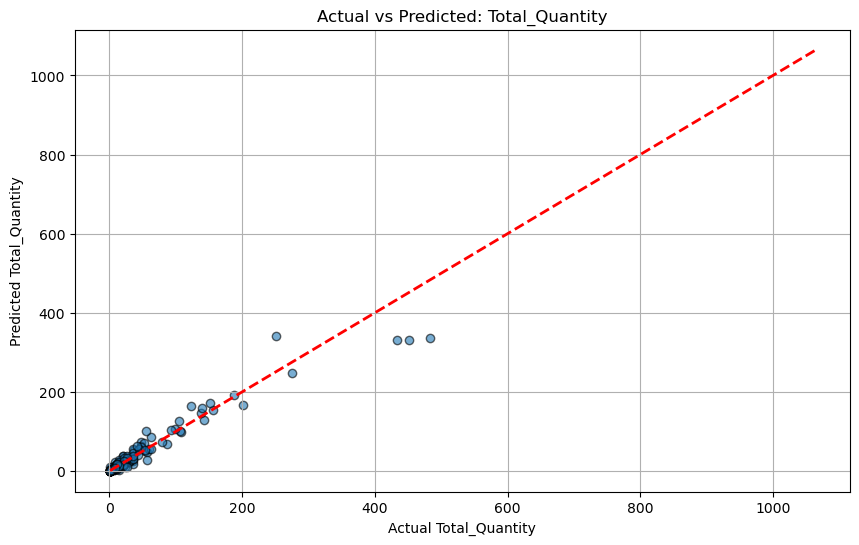

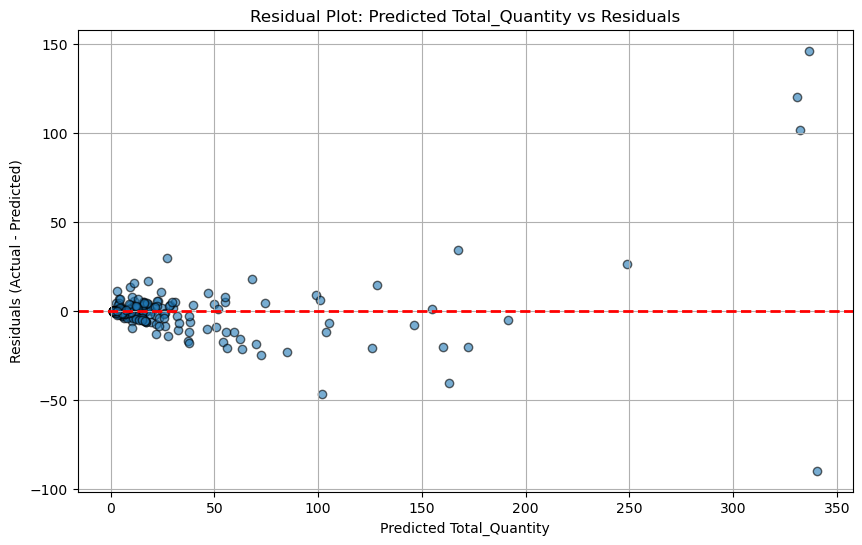

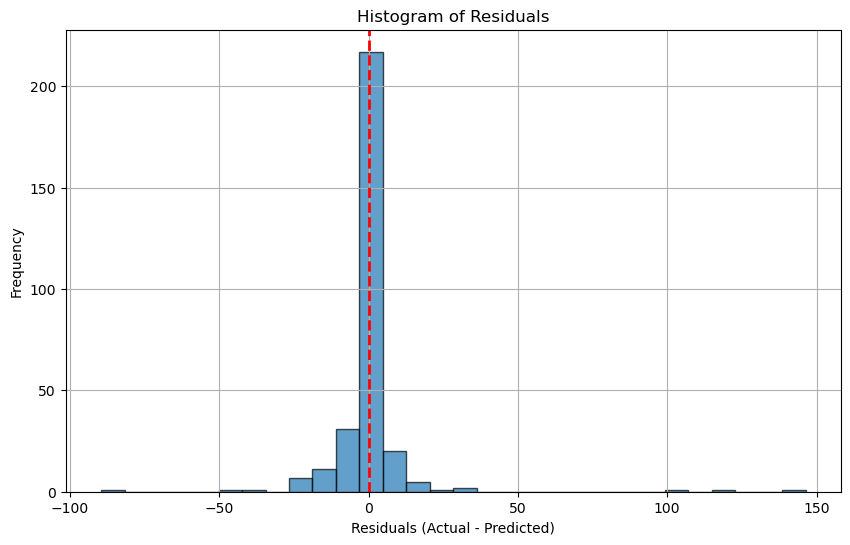

In [163]:
# Scatter plot: actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolor="k")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", linestyle="--", linewidth=2)  # Perfect prediction line
plt.title("Actual vs Predicted: Total_Quantity")
plt.xlabel("Actual Total_Quantity")
plt.ylabel("Predicted Total_Quantity")
plt.grid(True)
plt.show()

# Residual plot: residuals vs predictions
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6, edgecolor="k")
plt.axhline(y=0, color="red", linestyle="--", linewidth=2)
plt.title("Residual Plot: Predicted Total_Quantity vs Residuals")
plt.xlabel("Predicted Total_Quantity")
plt.ylabel("Residuals (Actual - Predicted)")
plt.grid(True)
plt.show()

# Histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, alpha=0.7, edgecolor="k")
plt.axvline(x=0, color="red", linestyle="--", linewidth=2)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

- Actual vs Predicted Scatter Plot:
The closer the points are to the red diagonal line, the better the predictions.
The model demonstrates a strong alignment, indicating accurate predictions.

- Residual Plot:
Residuals (actual - predicted values) are scattered around zero without a clear pattern, indicating that the model errors are randomly distributed.
This is a good sign for a well-fit model.

- Histogram of Residuals:
The distribution of residuals is roughly centered around zero, supporting the model's unbiased predictions.

# Simulation

### What if we change the values in our NASA Apollo 11 Lunar Lander:
- Price: The original price was $99.99, increased by $15 to $114.99.
- Rating: The rating was improved from 4.4 to 4.9.

In [164]:
# Select a different LEGO set for analysis (e.g., the LEGO set in the dataset)
selected_lego_1 = model_lego_data_cleaned.iloc[1]  # Choosing the LEGO set as an example
lego_name_1 = selected_lego_1['Name']

# Extract the features for the selected LEGO set
original_features_1 = selected_lego_1[features]

# Simulate "what-if" scenario without changing 'Pieces'
scenario_features_1 = original_features_1.copy()

# Modify other key inputs
scenario_features_1['USD_MSRP'] += 15  # Increase price by $15
scenario_features_1['Rating'] = 4.9  # Improve rating to 4.9

# Predict Total_Quantity with the modified features
original_prediction_1 = model.predict(original_features_1.values.reshape(1, -1))[0]
scenario_prediction_1 = model.predict(scenario_features_1.values.reshape(1, -1))[0]

scenario_changes_1 = {
    'LEGO Set': lego_name_1,
    'Original Price (USD)': selected_lego_1['USD_MSRP'],
    'Modified Price (USD)': selected_lego_1['USD_MSRP'] + 15,
    'Original Rating': selected_lego_1['Rating'],
    'Modified Rating': 4.9,
    'Original Pieces': selected_lego_1['Pieces'],
    'Predicted Quantity (Original)': original_prediction_1,
    'Predicted Quantity (Modified)': scenario_prediction_1
}

scenario_changes_1

{'LEGO Set': 'NASA Apollo 11 Lunar Lander',
 'Original Price (USD)': 99.99,
 'Modified Price (USD)': 114.99,
 'Original Rating': 4.4,
 'Modified Rating': 4.9,
 'Original Pieces': 1087.0,
 'Predicted Quantity (Original)': 21.08,
 'Predicted Quantity (Modified)': 20.93}

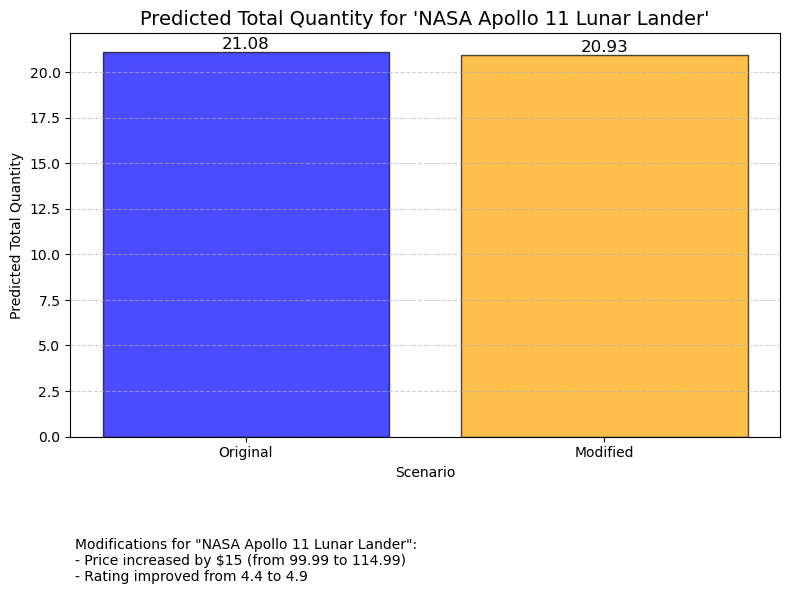

In [165]:
# Visualization of the scenario comparison
categories = ['Original', 'Modified']
quantities = [original_prediction_1, scenario_prediction_1]

# Highlight the changes made
modifications = f"""
Modifications for "{lego_name_1}":
- Price increased by $15 (from {selected_lego_1['USD_MSRP']} to {selected_lego_1['USD_MSRP'] + 15})
- Rating improved from {selected_lego_1['Rating']} to 4.9
"""

# Create the bar chart
plt.figure(figsize=(8, 5))
plt.bar(categories, quantities, color=['blue', 'orange'], alpha=0.7, edgecolor="k")
plt.title(f"Predicted Total Quantity for '{lego_name_1}'", fontsize=14)
plt.ylabel("Predicted Total Quantity")
plt.xlabel("Scenario")
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add annotations for values
for i, qty in enumerate(quantities):
    plt.text(i, qty + 0.2, f"{qty:.2f}", ha='center', fontsize=12)

plt.figtext(0.1, -0.2, modifications, fontsize=10, wrap=True)
plt.tight_layout()
plt.show()

#### Explanation:
- The price increase had a negative impact on demand.
- The rating improvement had a positive impact but wasn't strong enough to fully offset the price increase.
- The net result was a minor decrease in predicted sales, showing that for this product, customers may be more price-sensitive than responsive to small rating improvement

In [166]:
# Select a different LEGO set for analysis (e.g., the LEGO set in the dataset)
selected_lego_2 = model_lego_data_cleaned.iloc[2]  # Choosing the LEGO set as an example
lego_name_2 = selected_lego_2['Name']

# Extract the features for the selected LEGO set
original_features_2 = selected_lego_2[features]

# Simulate "what-if" scenario without changing 'Pieces'
scenario_features_2 = original_features_2.copy()

# Modify other key inputs
scenario_features_2['USD_MSRP'] -= 70  # Decrease price by $100
scenario_features_2['Rating'] = 2  # Decrease rating to 2

# Predict Total_Quantity with the modified features
original_prediction_2 = model.predict(original_features_2.values.reshape(1, -1))[0]
scenario_prediction_2 = model.predict(scenario_features_2.values.reshape(1, -1))[0]

scenario_changes_2 = {
    'LEGO Set': lego_name_2,
    'Original Price (USD)': selected_lego_2['USD_MSRP'],
    'Modified Price (USD)': selected_lego_2['USD_MSRP'] - 70,
    'Original Rating': selected_lego_2['Rating'],
    'Modified Rating': 2,
    'Original Pieces': selected_lego_2['Pieces'],
    'Predicted Quantity (Original)': original_prediction_2,
    'Predicted Quantity (Modified)': scenario_prediction_2
}

scenario_changes_2

{'LEGO Set': 'Gingerbread House',
 'Original Price (USD)': 99.99,
 'Modified Price (USD)': 29.989999999999995,
 'Original Rating': 4.2,
 'Modified Rating': 2,
 'Original Pieces': 1477.0,
 'Predicted Quantity (Original)': 62.1,
 'Predicted Quantity (Modified)': 63.29}

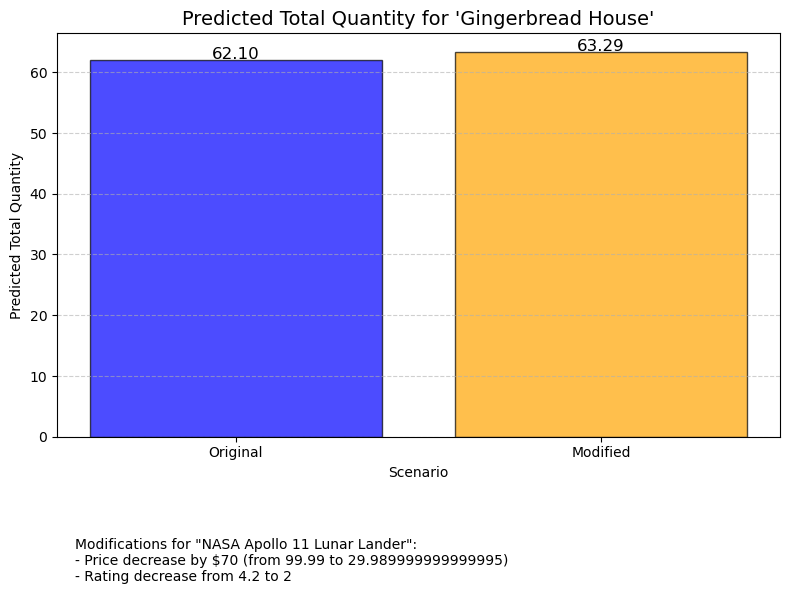

In [167]:
# Visualization of the scenario comparison
categories = ['Original', 'Modified']
quantities = [original_prediction_2, scenario_prediction_2]

# Highlight the changes made
modifications = f"""
Modifications for "{lego_name_1}":
- Price decrease by $70 (from {selected_lego_2['USD_MSRP']} to {selected_lego_2['USD_MSRP'] - 70})
- Rating decrease from {selected_lego_2['Rating']} to 2
"""

# Create the bar chart
plt.figure(figsize=(8, 5))
plt.bar(categories, quantities, color=['blue', 'orange'], alpha=0.7, edgecolor="k")
plt.title(f"Predicted Total Quantity for '{lego_name_2}'", fontsize=14)
plt.ylabel("Predicted Total Quantity")
plt.xlabel("Scenario")
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add annotations for values
for i, qty in enumerate(quantities):
    plt.text(i, qty + 0.2, f"{qty:.2f}", ha='center', fontsize=12)

plt.figtext(0.1, -0.2, modifications, fontsize=10, wrap=True)
plt.tight_layout()
plt.show()

In [168]:
from ipywidgets import FloatSlider, Dropdown, Button, VBox, Output
import matplotlib.pyplot as plt
import pandas as pd

# Function to predict and visualize
def predict_and_visualize(name, usd_msrp, rating, profit_margin, price_elasticity, pieces, age_of_set):
    lego_selected = model_lego_data_cleaned[model_lego_data_cleaned['Name'] == name].iloc[0]
    
    # Original features
    features = ['Pieces', 'Owned', 'Rating', 'USD_MSRP', 'Age_of_Set', 
                'Price_per_Piece', 'Age_to_Price_Ratio', 
                'Theme_Quantity_Interaction', 'Price_Elasticity', 'Profit_Margin']
    original_features = lego_selected[features].to_dict()
    
    # Update features with user input
    adjusted_features = original_features.copy()
    adjusted_features['USD_MSRP'] = usd_msrp
    adjusted_features['Rating'] = rating
    adjusted_features['Profit_Margin'] = profit_margin
    adjusted_features['Price_Elasticity'] = price_elasticity
    adjusted_features['Pieces'] = pieces
    adjusted_features['Age_of_Set'] = age_of_set
    
    # Prepare features for prediction
    adjusted_features_df = pd.DataFrame([adjusted_features])
    prediction = model.predict(adjusted_features_df)[0]
    original_prediction = model.predict(pd.DataFrame([original_features]))[0]
    
    # Clear previous output and plot
    visualization_output.clear_output(wait=True)
    with visualization_output:
        plt.figure(figsize=(6, 6))
        plt.bar(['Original', 'Adjusted'], [original_prediction, prediction], 
                color=['blue', 'orange'], alpha=0.7, edgecolor="k")
        plt.title(f"Predicted Total Quantity for '{name}'", fontsize=14)
        plt.ylabel("Predicted Total Quantity")
        plt.grid(axis='y', linestyle='--', alpha=0.6)
        plt.text(0, original_prediction + 0.1, f"{original_prediction:.2f}", 
                 ha='center', fontsize=12)
        plt.text(1, prediction + 0.1, f"{prediction:.2f}", ha='center', fontsize=12)
        plt.tight_layout()
        plt.show()

# List of LEGO names
lego_names = model_lego_data_cleaned['Name'].unique()

# Widgets for user input
lego_selector = Dropdown(options=lego_names, description='LEGO Set:')
usd_msrp_slider = FloatSlider(value=100.0, min=1.0, max=500.0, step=1.0, description='USD MSRP:')
rating_slider = FloatSlider(value=4.0, min=1.0, max=5.0, step=0.1, description='Rating:')
profit_margin_slider = FloatSlider(value=10.0, min=-100.0, max=100.0, step=1.0, description='Profit Margin:')
price_elasticity_slider = FloatSlider(value=1.0, min=0.1, max=2.0, step=0.1, description='Price Elasticity:')
pieces_slider = FloatSlider(value=1000.0, min=1.0, max=5000.0, step=1.0, description='Pieces:')
age_of_set_slider = FloatSlider(value=5.0, min=0.0, max=20.0, step=1.0, description='Age of Set:')

# Button to trigger prediction and visualization
run_button = Button(description='Run Prediction', button_style='success')

# Container for visualization output
visualization_output = Output()

# Function to update sliders when a new LEGO set is selected
def update_sliders(change):
    lego_selected = model_lego_data_cleaned[model_lego_data_cleaned['Name'] == change['new']].iloc[0]
    usd_msrp_slider.value = lego_selected['USD_MSRP']
    rating_slider.value = lego_selected['Rating']
    profit_margin_slider.value = lego_selected['Profit_Margin']
    price_elasticity_slider.value = lego_selected['Price_Elasticity']
    pieces_slider.value = lego_selected['Pieces']
    age_of_set_slider.value = lego_selected['Age_of_Set']

# Link the dropdown to the slider update function
lego_selector.observe(update_sliders, names='value')

# Update function
def update_visualization(*args):
    predict_and_visualize(
        lego_selector.value,
        usd_msrp_slider.value,
        rating_slider.value,
        profit_margin_slider.value,
        price_elasticity_slider.value,
        pieces_slider.value,
        age_of_set_slider.value
    )

# Link button to update function
run_button.on_click(update_visualization)

# Layout the GUI
ui = VBox([
    lego_selector,
    usd_msrp_slider,
    rating_slider,
    profit_margin_slider,
    price_elasticity_slider,
    pieces_slider,
    age_of_set_slider,
    run_button,
    visualization_output
])

ui